In [6]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

%matplotlib inline

In [2]:
# read in the datasets

house = pd.read_csv('../datasets//train_df.csv', index_col = 'id')
test = pd.read_csv('../datasets/test_df.csv', index_col = 'id')

## Scenario 1
#### Overall Quality, Total SQ FT

In [3]:
# set X and y

xvars1 = ['overall_qual', 'total_sf']
X1 = house[xvars1]
y1 = np.log(house['saleprice'])  # --> logging the price since this had better linear relationship with a lot of factors

In [4]:
X1.head()

,overall_qual,total_sf
id,,
109,6,2204.0
544,7,3035.0
153,5,2114.0
318,5,1828.0
255,6,2121.0


In [228]:
# train test split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 42, train_size = 0.7)

In [229]:
print(X1_train.shape)
print(X1_test.shape)

(1444, 2)
(482, 2)


In [230]:
## establish a baseline model for comparison

y1_train_baseline = [y1_train.mean()] * len(y1_train)        
y1_test_baseline  = [y1_train.mean()] * len(y1_test)

In [231]:
## calculate RMSE for the baseline train and test preds

print(f"Baseline RMSE - Train: {metrics.mean_squared_error(y1_train, y1_train_baseline, squared = False)}")
print(f"Baseline RMSE - Test: {metrics.mean_squared_error(y1_test, y1_test_baseline, squared = False)}")

Baseline RMSE - Train: 0.4001730752443746
Baseline RMSE - Test: 0.40429075444366713


In [232]:
# instantiate linear regression model

lm = LinearRegression()

In [233]:
# get cross validation scores
# train dataset

print('Cross Validation Scores: ', cross_val_score(estimator = lm, X = X1_train, y = y1_train))
print('Cross Validation Mean Score: ', cross_val_score(estimator = lm, X = X1_train, y = y1_train).mean())

Cross Validation Scores:  [0.81780923 0.79946193 0.80211292 0.81038776 0.83010224]
Cross Validation Mean Score:  0.8119748136797733


In [234]:
# test dataset

print('Cross Validation Scores: ', cross_val_score(estimator = lm, X = X1_test, y = y1_test))
print('Cross Validation Mean Score: ', cross_val_score(estimator = lm, X = X1_test, y = y1_test).mean())

Cross Validation Scores:  [0.86339005 0.71047971 0.69125125 0.83378712 0.87061009]
Cross Validation Mean Score:  0.7939036417903462


In [236]:
# fit the model

lm.fit(X1_train, y1_train)

LinearRegression()

In [237]:
# get coefficients and store them in a dataframe

lm_coef = pd.DataFrame({
                            'column': X1.columns,
                            'coef' : lm.coef_
                          })

In [238]:
lm.coef_

array([0.14021518, 0.00025301])

In [239]:
## subset `test` to just the features we included in our model

X1_kaggle = test.loc[:, xvars1]

In [240]:
X1_kaggle.head()

,overall_qual,total_sf
id,,
2658,6,2948
2718,5,3934
2414,7,2150
1989,5,1936
625,6,2788


In [241]:
## use the same model to predict on the test data, save predictions to a `SalePrice` column

X1_kaggle['saleprice'] = np.exp(lm.predict(X1_kaggle))

In [242]:
X1_kaggle.head(3)

,overall_qual,total_sf,saleprice
id,,,
2658,6,2948,181889.151583
2718,5,3934,202887.866123
2414,7,2150,171007.592759


In [243]:
# store the saleprice 

output1 = X1_kaggle[['saleprice']]

In [244]:
output1.head()

,saleprice
id,
2658,181889.151583
2718,202887.866123
2414,171007.592759
1989,122380.219055
625,174672.939219


In [245]:
# save the prediction to csv

output1.to_csv('../datasets/submission1.csv')

## Scenario 2
#### Overall Quality, Total SQ FT, House Age

In [246]:
# set up X and y

xvars2 = ['overall_qual', 'total_sf', 'age_sale']
X2 = house[xvars2]
y2 = np.log(house['saleprice'])

In [247]:
X2.head()

,overall_qual,total_sf,age_sale
id,,,
109,6,2204.0,34
544,7,3035.0,13
153,5,2114.0,57
318,5,1828.0,4
255,6,2121.0,110


In [248]:
# instantiate linear regression model

lm2 = LinearRegression()

In [249]:
# train test split and get corss validation scores
# train dataset

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 42, train_size = 0.7)

print('Cross Validation Scores: ', cross_val_score(estimator = lm2, X = X2_train, y = y2_train))
print('Cross Validation Mean Score: ', cross_val_score(estimator = lm2, X = X2_train, y = y2_train).mean())

Cross Validation Scores:  [0.84211742 0.82149386 0.82951077 0.83971302 0.85952846]
Cross Validation Mean Score:  0.8384727073058353


In [250]:
# cross validation score on test dataset

print('Cross Validation Scores: ', cross_val_score(estimator = lm2, X = X2_test, y = y2_test))
print('Cross Validation Mean Score: ', cross_val_score(estimator = lm2, X = X2_test, y = y2_test).mean())

Cross Validation Scores:  [0.86880793 0.78229076 0.69591152 0.87238239 0.8856197 ]
Cross Validation Mean Score:  0.82100246159248


In [251]:
# fit the model

lm2.fit(X2_train, y2_train)

LinearRegression()

In [252]:
# get coefficients and store them in a dataframe

lm2_coef = pd.DataFrame({
                            'column': X2.columns,
                            'coef' : lm2.coef_
                          })

In [254]:
lm2_coef

,column,coef
0,overall_qual,0.107608
1,total_sf,0.000251
2,age_sale,-0.002742


In [255]:
# subset `test` to just the features we included in our model

X2_kaggle = test.loc[:, xvars2]

In [256]:
X2_kaggle.head()

,overall_qual,total_sf,age_sale
id,,,
2658,6,2948,96
2718,5,3934,29
2414,7,2150,0
1989,5,1936,84
625,6,2788,46


In [257]:
# use the same model to predict on the test data, save predictions to a `SalePrice` column

X2_kaggle['saleprice'] = np.exp(lm2.predict(X2_kaggle))

In [258]:
X2_kaggle.head(3)

,overall_qual,total_sf,age_sale,saleprice
id,,,,
2658,6,2948,96,154870.974041
2718,5,3934,29,213997.280186
2414,7,2150,0,183709.413772


In [259]:
# save the prediction

output2 = X2_kaggle[['saleprice']]

In [260]:
output2.head()

,saleprice
id,
2658,154870.974041
2718,213997.280186
2414,183709.413772
1989,111511.173508
625,170644.956269


In [261]:
# save to csv

output2.to_csv('../datasets/submission2.csv')

## Scenario 3
#### Overall Quality, Total SQ FT, Garage Area, House Age at Sale

In [263]:
# check for null values again to make sure there's no nan

house.loc[house['garage_area'].isnull() == True][['garage_area']]

# there's only one NaN --> will drop this row.

house = house[house['garage_area'].notna()]

In [264]:
# set X and y

xvars3 = ['overall_qual','total_sf', 'age_sale', 'garage_area']
X3 = house[xvars3]
y3 = np.log(house['saleprice'])

In [265]:
X3.head()

,overall_qual,total_sf,age_sale,garage_area
id,,,,
109,6,2204.0,34,475.0
544,7,3035.0,13,559.0
153,5,2114.0,57,246.0
318,5,1828.0,4,400.0
255,6,2121.0,110,484.0


In [266]:
# instantiate linear regression model

lm3 = LinearRegression()

In [267]:
# train test split

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state = 42, train_size = 0.7)

In [268]:
# train dataset cross validation score

print('Cross Validation Scores: ', cross_val_score(estimator = lm3, X = X3_train, y = y3_train))
print('Cross Validation Mean Score: ', cross_val_score(estimator = lm3, X = X3_train, y = y3_train).mean())

Cross Validation Scores:  [0.85414194 0.8393993  0.83302564 0.85214996 0.87417739]
Cross Validation Mean Score:  0.8505788466441795


In [269]:
# test datset cross validation score

print('Cross Validation Scores: ', cross_val_score(estimator = lm3, X = X3_test, y = y3_test))
print('Cross Validation Mean Score: ', cross_val_score(estimator = lm3, X = X3_test, y = y3_test).mean())

Cross Validation Scores:  [0.87545362 0.79732053 0.67642252 0.86501751 0.89597565]
Cross Validation Mean Score:  0.8220379665282905


In [270]:
# fit the model

lm3.fit(X3_train, y3_train)

LinearRegression()

In [271]:
# get the coefficients and store them in a dataframe

lm3_coef = pd.DataFrame({
                            'column': X3.columns,
                            'coef' : lm3.coef_
                          })

In [272]:
lm3.coef_

array([ 0.09944652,  0.00022247, -0.00237913,  0.00027269])

In [273]:
# subset `test` to just the features we included in our model

X3_kaggle = test.loc[:, xvars3]

In [274]:
X3_kaggle.head()

,overall_qual,total_sf,age_sale,garage_area
id,,,,
2658,6,2948,96,440
2718,5,3934,29,580
2414,7,2150,0,426
1989,5,1936,84,480
625,6,2788,46,514


In [275]:
# use the same model to predict on the test data, save predictions to a `SalePrice` column

X3_kaggle['saleprice'] = np.exp(lm3.predict(X3_kaggle))

In [276]:
X3_kaggle.head(3)

,overall_qual,total_sf,age_sale,garage_area,saleprice
id,,,,,
2658,6,2948,96,440,155121.410130
2718,5,3934,29,580,213086.717937
2414,7,2150,0,426,179594.010990


In [277]:
# store the prediction

output3 = X3_kaggle[['saleprice']]

In [278]:
output3.head()

,saleprice
id,
2658,155121.410130
2718,213086.717937
2414,179594.010990
1989,116638.008859
625,172043.576652


In [279]:
# savw to csv

output3.to_csv('../datasets/submission3.csv')

## Scenario 4
#### Overall Quality, Total SQ FT, House age at sale, Garage Area, Neighborhood

In [280]:
# set X and y

xvars4 = ['overall_qual', 'total_sf', 'age_sale', 'garage_area',
          'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr', 'neighborhood_CollgCr',
          'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_GrnHill', 
          'neighborhood_IDOTRR', 'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes', 
          'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 
          'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr', 
          'neighborhood_Timber', 'neighborhood_Veenker']
X4 = house[xvars4]
y4 = np.log(house['saleprice'])

In [281]:
X4.head()

,overall_qual,total_sf,age_sale,garage_area,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
id,,,,,,,,,,,,,,,,,,,,,
109,6,2204.0,34,475.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
544,7,3035.0,13,559.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
153,5,2114.0,57,246.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,5,1828.0,4,400.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
255,6,2121.0,110,484.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [282]:
# instantiate linear regression model

lm4 = LinearRegression()

In [283]:
# train test split

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, random_state = 42, train_size = 0.7)

In [283]:
# train dataset cross validation score

print('Cross Validation Scores: ', cross_val_score(estimator = lm4, X = X4_train, y = y4_train))
print('Cross Validation Mean Score: ', cross_val_score(estimator = lm4, X = X4_train, y = y4_train).mean())

Cross Validation Scores:  [0.86680885 0.86080164 0.84210375 0.86875498 0.89283443]
Cross Validation Mean Score:  0.8662607298135916


In [284]:
# test dataset cross validation score

print('Cross Validation Scores: ', cross_val_score(estimator = lm4, X = X4_test, y = y4_test))
print('Cross Validation Mean Score: ', cross_val_score(estimator = lm4, X = X4_test, y = y4_test).mean())

Cross Validation Scores:  [0.86915853 0.79907436 0.70677634 0.87912134 0.90853074]
Cross Validation Mean Score:  0.8325322615621535


In [285]:
# fit the model

lm4.fit(X4_train, y4_train)

LinearRegression()

In [286]:
# get coefficients and store them in a dataframe

lm4_coef = pd.DataFrame({
                            'column': X4.columns,
                            'coef' : lm4.coef_
                          })

In [287]:
lm4_coef

,column,coef
0,overall_qual,0.094700
1,total_sf,0.000204
2,age_sale,-0.001924
3,garage_area,0.000259
4,neighborhood_Blueste,-0.111458
5,neighborhood_BrDale,-0.178705
6,neighborhood_BrkSide,-0.013267
7,neighborhood_ClearCr,0.236454
8,neighborhood_CollgCr,0.025678
9,neighborhood_Crawfor,0.175481


In [288]:
# subset `test` to just the features included in model

X4_kaggle = test.loc[:, xvars4]

In [289]:
X4_kaggle.head()

,overall_qual,total_sf,age_sale,garage_area,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
id,,,,,,,,,,,,,,,,,,,,,
2658,6,2948,96,440,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2718,5,3934,29,580,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2414,7,2150,0,426,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989,5,1936,84,480,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
625,6,2788,46,514,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [290]:
# use the same model to predict on the test data, save predictions to a `SalePrice` column

X4_kaggle['saleprice'] = np.exp(lm4.predict(X4_kaggle))

In [291]:
X4_kaggle.head(3)

,overall_qual,total_sf,age_sale,garage_area,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,...,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,saleprice
id,,,,,,,,,,,,,,,,,,,,,
2658,6,2948,96,440,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,145893.650286
2718,5,3934,29,580,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,209224.646668
2414,7,2150,0,426,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,185801.852159


In [292]:
# save the prediction

output4 = X4_kaggle[['saleprice']]

In [293]:
output4.head()

,saleprice
id,
2658,145893.650286
2718,209224.646668
2414,185801.852159
1989,111597.350419
625,172920.485174


In [294]:
# save to csv

output4.to_csv('./datasets/submission4.csv')

## Scenario 5
#### Overall Quality, Total SQ FT, House age at sale, Garage Area, Neighborhood, Central Air

In [295]:
# set up X and y

xvars5 = ['overall_qual', 'total_sf', 'age_sale', 'garage_area',
          'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr', 'neighborhood_CollgCr',
          'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_GrnHill', 
          'neighborhood_IDOTRR', 'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes', 
          'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 
          'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr', 
          'neighborhood_Timber', 'neighborhood_Veenker', 'central_air']

X5 = house[xvars5]
y5 = np.log(house['saleprice'])

In [296]:
X5.head()

,overall_qual,total_sf,age_sale,garage_area,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,...,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,central_air
id,,,,,,,,,,,,,,,,,,,,,
109,6,2204.0,34,475.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
544,7,3035.0,13,559.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
153,5,2114.0,57,246.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
318,5,1828.0,4,400.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
255,6,2121.0,110,484.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [297]:
# instantiate linear regression model

lm5 = LinearRegression()

In [298]:
# train test split

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, random_state = 42, train_size = 0.7)

In [299]:
# train dataset cross validation

print('Cross Validation Scores: ', cross_val_score(estimator = lm5, X = X5_train, y = y5_train))
print('Cross Validation Mean Score: ', cross_val_score(estimator = lm5, X = X5_train, y = y5_train).mean())

Cross Validation Scores:  [0.87009463 0.86059389 0.8472039  0.87366069 0.89293741]
Cross Validation Mean Score:  0.8688981044977726


In [300]:
# test dataset cross validation

print('Cross Validation Scores: ', cross_val_score(estimator = lm5, X = X5, y = y5))
print('Cross Validation Mean Score: ', cross_val_score(estimator = lm5, X = X5, y = y5).mean())

Cross Validation Scores:  [0.85452617 0.8807973  0.87849846 0.82925307 0.88981109]
Cross Validation Mean Score:  0.866577216700908


In [301]:
# fit the model

lm5.fit(X5_train, y5_train)

LinearRegression()

In [302]:
# get coefficients and store them in a dataframe

lm5_coef = pd.DataFrame({
                            'column': X5.columns,
                            'coef' : lm5.coef_
                          })

In [303]:
lm5_coef

,column,coef
0,overall_qual,0.092393
1,total_sf,0.000202
2,age_sale,-0.001785
3,garage_area,0.000250
4,neighborhood_Blueste,-0.119031
5,neighborhood_BrDale,-0.191533
6,neighborhood_BrkSide,-0.021943
7,neighborhood_ClearCr,0.230132
8,neighborhood_CollgCr,0.024463
9,neighborhood_Crawfor,0.171997


In [304]:
# subset `test` to just the features included in model

X5_kaggle = test.loc[:, xvars5]

In [305]:
X5_kaggle.head()

,overall_qual,total_sf,age_sale,garage_area,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,...,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,central_air
id,,,,,,,,,,,,,,,,,,,,,
2658,6,2948,96,440,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2718,5,3934,29,580,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2414,7,2150,0,426,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1989,5,1936,84,480,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
625,6,2788,46,514,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [306]:
# predict

X5_kaggle['saleprice'] = np.exp(lm5.predict(X5_kaggle))

In [307]:
X5_kaggle.head(3)

,overall_qual,total_sf,age_sale,garage_area,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,...,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,central_air,saleprice
id,,,,,,,,,,,,,,,,,,,,,
2658,6,2948,96,440,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,135025.625731
2718,5,3934,29,580,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,208688.741998
2414,7,2150,0,426,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,185710.898845


In [308]:
# save prediction

output5 = X5_kaggle[['saleprice']]

In [309]:
output5.head()

,saleprice
id,
2658,135025.625731
2718,208688.741998
2414,185710.898845
1989,113950.957718
625,172977.921459


In [310]:
# save to csv for kaggle submission

output5.to_csv('./datasets/submission5.csv')

## Scenario 6
#### Overall Quality, Total SQ FT, Neighborhood, House age at sale, Remodel age at sale, Garage area, Central air

In [311]:
# set up X and y

xvars6 = ['overall_qual', 'total_sf', 'age_sale', 'garage_area', 'remod_age',
          'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr', 'neighborhood_CollgCr',
          'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_GrnHill', 
          'neighborhood_IDOTRR', 'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes', 
          'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 
          'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr', 
          'neighborhood_Timber', 'neighborhood_Veenker', 'central_air']

X6 = house[xvars6]
y6 = np.log(house['saleprice'])

In [312]:
X6.head()

,overall_qual,total_sf,age_sale,garage_area,remod_age,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,...,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,central_air
id,,,,,,,,,,,,,,,,,,,,,
109,6,2204.0,34,475.0,5,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
544,7,3035.0,13,559.0,12,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
153,5,2114.0,57,246.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
318,5,1828.0,4,400.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
255,6,2121.0,110,484.0,17,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [313]:
# instantiate linear regression model

lm6 = LinearRegression()

In [314]:
# train test split

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state = 42, train_size = 0.7)

In [315]:
# train dataset cross validation

print('Cross Validation Scores: ', cross_val_score(estimator = lm6, X = X6_train, y = y6_train))
print('Cross Validation Mean Score: ', cross_val_score(estimator = lm6, X = X6_train, y = y6_train).mean())

Cross Validation Scores:  [0.87786429 0.86650874 0.85250018 0.88134528 0.90065678]
Cross Validation Mean Score:  0.875775054842071


In [316]:
# test dataset cross validation

print('Cross Validation Scores: ', cross_val_score(estimator = lm6, X = X6_test, y = y6_test))
print('Cross Validation Mean Score: ', cross_val_score(estimator = lm6, X = X6_test, y = y6_test).mean())

Cross Validation Scores:  [0.89015504 0.84593146 0.73831631 0.88323432 0.9024703 ]
Cross Validation Mean Score:  0.8520214855631053


In [317]:
# fit the model

lm6.fit(X6_train, y6_train)

LinearRegression()

In [318]:
# get coefficients and store in a dataframe

lm6_coef = pd.DataFrame({
                            'column': X6.columns,
                            'coef' : lm6.coef_
                          })

In [319]:
lm6_coef

,column,coef
0,overall_qual,0.084242
1,total_sf,0.000203
2,age_sale,-0.001263
3,garage_area,0.000244
4,remod_age,-0.002214
5,neighborhood_Blueste,-0.081552
6,neighborhood_BrDale,-0.148244
7,neighborhood_BrkSide,0.012848
8,neighborhood_ClearCr,0.247049
9,neighborhood_CollgCr,0.032227


In [320]:
# subset `test` to just the features included in model

X6_kaggle = test.loc[:, xvars6]

In [321]:
X6_kaggle.head()

,overall_qual,total_sf,age_sale,garage_area,remod_age,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,...,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,central_air
id,,,,,,,,,,,,,,,,,,,,,
2658,6,2948,96,440,56,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2718,5,3934,29,580,29,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2414,7,2150,0,426,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1989,5,1936,84,480,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
625,6,2788,46,514,46,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [322]:
# predict

X6_kaggle['saleprice'] = np.exp(lm6.predict(X6_kaggle))

In [323]:
X6_kaggle.head(3)

,overall_qual,total_sf,age_sale,garage_area,remod_age,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,...,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,central_air,saleprice
id,,,,,,,,,,,,,,,,,,,,,
2658,6,2948,96,440,56,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,130227.631636
2718,5,3934,29,580,29,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,208416.772429
2414,7,2150,0,426,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,188001.568159


In [324]:
# save the prediction

output6 = X6_kaggle[['saleprice']]

In [325]:
output6.head()

,saleprice
id,
2658,130227.631636
2718,208416.772429
2414,188001.568159
1989,122761.923059
625,168487.754345


In [326]:
# save to csv for submission

output6.to_csv('./datasets/submission6.csv')

## Scenario 7
#### Overall Quality, Total SQ FT, Neighborhood, House age at sale, Remodel age at sale, Garage area, Central air, Overall Quality * Total SQ FT

In [327]:
# set up X and y

xvars7 = ['overall_qual', 'total_sf', 'age_sale', 'garage_area', 'remod_age',
          'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr', 'neighborhood_CollgCr',
          'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_GrnHill', 
          'neighborhood_IDOTRR', 'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes', 
          'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 
          'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr', 
          'neighborhood_Timber', 'neighborhood_Veenker', 'central_air', 'qual_sf']
X7 = house[xvars7]
y7 = np.log(house['saleprice'])

In [328]:
X7.head()

,overall_qual,total_sf,age_sale,garage_area,remod_age,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,...,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,central_air,qual_sf
id,,,,,,,,,,,,,,,,,,,,,
109,6,2204.0,34,475.0,5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,13224.0
544,7,3035.0,13,559.0,12,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,21245.0
153,5,2114.0,57,246.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10570.0
318,5,1828.0,4,400.0,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,9140.0
255,6,2121.0,110,484.0,17,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,12726.0


In [329]:
# instantiate linear regression model

lm7 = LinearRegression()

In [330]:
# train test split

X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, random_state = 42, train_size = 0.7)

In [331]:
# train dataset cross validation 

print('Cross Validation Scores: ', cross_val_score(estimator = lm7, X = X7_train, y = y7_train))
print('Cross Validation Mean Score: ', cross_val_score(estimator = lm7, X = X7_train, y = y7_train).mean())

Cross Validation Scores:  [0.87888071 0.86722222 0.85199959 0.88197519 0.90094666]
Cross Validation Mean Score:  0.8762048743075945


In [332]:
# test dataset cross validation

print('Cross Validation Scores: ', cross_val_score(estimator = lm7, X = X7_test, y = y7_test))
print('Cross Validation Mean Score: ', cross_val_score(estimator = lm7, X = X7_test, y = y7_test).mean())

Cross Validation Scores:  [0.89075614 0.84634149 0.73670164 0.88352246 0.90249282]
Cross Validation Mean Score:  0.8519629098252771


In [333]:
# fit the model

lm7.fit(X7_train, y7_train)

LinearRegression()

In [334]:
# save coefficients in a dataframe

lm7_coef = pd.DataFrame({
                            'column': X7.columns,
                            'coef' : lm7.coef_
                          })

In [335]:
lm7_coef

,column,coef
0,overall_qual,0.063976
1,total_sf,0.000152
2,age_sale,-0.001254
3,garage_area,0.000239
4,remod_age,-0.002219
5,neighborhood_Blueste,-0.079910
6,neighborhood_BrDale,-0.149471
7,neighborhood_BrkSide,0.007023
8,neighborhood_ClearCr,0.247651
9,neighborhood_CollgCr,0.030245


In [336]:
# subset `test` to just the features included in model

X7_kaggle = test.loc[:, xvars7]

In [337]:
X7_kaggle.head()

,overall_qual,total_sf,age_sale,garage_area,remod_age,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,...,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,central_air,qual_sf
id,,,,,,,,,,,,,,,,,,,,,
2658,6,2948,96,440,56,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,17688
2718,5,3934,29,580,29,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,19670
2414,7,2150,0,426,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,15050
1989,5,1936,84,480,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,9680
625,6,2788,46,514,46,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,16728


In [338]:
# predict the sale price

X7_kaggle['saleprice'] = np.exp(lm7.predict(X7_kaggle))

In [339]:
X7_kaggle.head(3)

,overall_qual,total_sf,age_sale,garage_area,remod_age,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,...,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,central_air,qual_sf,saleprice
id,,,,,,,,,,,,,,,,,,,,,
2658,6,2948,96,440,56,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17688,128300.655140
2718,5,3934,29,580,29,0,0,0,0,0,...,0,1,0,0,0,0,0,1,19670,204335.057717
2414,7,2150,0,426,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,15050,187530.381409


In [340]:
# save the prediction

output7 = X7_kaggle[['saleprice']]

In [341]:
output7.head()

,saleprice
id,
2658,128300.655140
2718,204335.057717
2414,187530.381409
1989,122909.845376
625,167761.278470


In [342]:
# save to csv

output7.to_csv('./datasets/submission7.csv')

## Scenario 8
#### Polynomial features

In [343]:
# import the libraries

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [344]:
# instantiate polynomial features

poly = PolynomialFeatures(include_bias = False)

In [345]:
poly

PolynomialFeatures(include_bias=False)

In [347]:
# set X and y

xvars8 = ['overall_qual', 'total_sf', 'age_sale', 'garage_area', 'remod_age',
          'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr', 'neighborhood_CollgCr',
          'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_GrnHill', 
          'neighborhood_IDOTRR', 'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes', 
          'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 
          'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr', 
          'neighborhood_Timber', 'neighborhood_Veenker', 'central_air']

X8 = house[xvars8]

y8 = np.log(house['saleprice'])

In [ ]:
# create X_poly

X8_poly = poly.fit_transform(X8)

# get the feature names

poly.get_feature_names(xvars8) 

# clear the output to save space

In [349]:
# view X_poly in a DataFrame

pd.DataFrame(X8_poly, columns = poly.get_feature_names(xvars8))

,overall_qual,total_sf,age_sale,garage_area,remod_age,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,...,neighborhood_StoneBr^2,neighborhood_StoneBr neighborhood_Timber,neighborhood_StoneBr neighborhood_Veenker,neighborhood_StoneBr central_air,neighborhood_Timber^2,neighborhood_Timber neighborhood_Veenker,neighborhood_Timber central_air,neighborhood_Veenker^2,neighborhood_Veenker central_air,central_air^2
0,6.0,2204.0,34.0,475.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7.0,3035.0,13.0,559.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5.0,2114.0,57.0,246.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5.0,1828.0,4.0,400.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,6.0,2121.0,110.0,484.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,8.0,3612.0,1.0,520.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1922,4.0,1722.0,69.0,539.0,59.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1923,6.0,2809.0,81.0,342.0,59.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1924,4.0,2400.0,53.0,294.0,53.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [350]:
# save it as a data frame

poly_df = pd.DataFrame(X8_poly, columns = poly.get_feature_names(xvars8))
poly_df.head()

,overall_qual,total_sf,age_sale,garage_area,remod_age,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,...,neighborhood_StoneBr^2,neighborhood_StoneBr neighborhood_Timber,neighborhood_StoneBr neighborhood_Veenker,neighborhood_StoneBr central_air,neighborhood_Timber^2,neighborhood_Timber neighborhood_Veenker,neighborhood_Timber central_air,neighborhood_Veenker^2,neighborhood_Veenker central_air,central_air^2
0,6.0,2204.0,34.0,475.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7.0,3035.0,13.0,559.0,12.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5.0,2114.0,57.0,246.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5.0,1828.0,4.0,400.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,6.0,2121.0,110.0,484.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [351]:
# instantiate a linear regression model

lm8 = LinearRegression()

In [352]:
# train test split

X8_train, X8_test, y8_train, y8_test = train_test_split(X8_poly, y8, random_state = 42, train_size = 0.7)

In [353]:
# train dataset cross validation

print('Cross Validation Scores: ', cross_val_score(estimator = lm8, X = X8_train, y = y8_train))
print('Cross Validation Mean Score: ', cross_val_score(estimator = lm8, X = X8_train, y = y8_train).mean())

Cross Validation Scores:  [0.83452535 0.83839076 0.54255601 0.85485489 0.87641574]
Cross Validation Mean Score:  0.7893485495128711


>Too much variance - Will not submit this model. Will keep overall quality * total sq ft polynomial feature however.

## Scenario 9
#### Regularization with Ridge and Lasso

In [6]:
# import libraries

from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [7]:
# set up X and y

xvars9 = ['overall_qual', 'total_sf', 'age_sale', 'garage_area', 'remod_age',
          'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide', 'neighborhood_ClearCr', 'neighborhood_CollgCr',
          'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert', 'neighborhood_Greens', 'neighborhood_GrnHill', 
          'neighborhood_IDOTRR', 'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel', 'neighborhood_NAmes', 
          'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown', 
          'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr', 
          'neighborhood_Timber', 'neighborhood_Veenker', 'central_air', 'qual_sf', 'lot_area', 'lot_frontage', 'overall_cond',
          'mas_vnr_area', 'bsmt_full_bath', 'bsmt_half_bath', 'totrms_abvgrd', 'fireplaces', 'garage_cars', 'full_bath', 'half_bath',
          'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual_Gd', 'kitchen_qual_TA', 'kitchen_qual_Fa']

X9 = house[xvars9]
y9 = house['saleprice']

In [8]:
X9.head()

,overall_qual,total_sf,age_sale,garage_area,remod_age,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,...,totrms_abvgrd,fireplaces,garage_cars,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual_Gd,kitchen_qual_TA,kitchen_qual_Fa
id,,,,,,,,,,,,,,,,,,,,,
109,6,2204.0,34,475.0,5,0,0,0,0,0,...,6,0,2.0,2,1,3,1,1,0,0
544,7,3035.0,13,559.0,12,0,0,0,0,0,...,8,1,2.0,2,1,4,1,1,0,0
153,5,2114.0,57,246.0,3,0,0,0,0,0,...,5,0,1.0,1,0,3,1,1,0,0
318,5,1828.0,4,400.0,3,0,0,0,0,0,...,7,0,2.0,2,1,3,1,0,1,0
255,6,2121.0,110,484.0,17,0,0,0,0,0,...,6,0,2.0,2,0,3,1,0,1,0


In [9]:
print(X9.shape)
X9.info()

(1926, 50)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926 entries, 109 to 10
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   overall_qual          1926 non-null   int64  
 1   total_sf              1926 non-null   float64
 2   age_sale              1926 non-null   int64  
 3   garage_area           1926 non-null   float64
 4   remod_age             1926 non-null   int64  
 5   neighborhood_Blueste  1926 non-null   int64  
 6   neighborhood_BrDale   1926 non-null   int64  
 7   neighborhood_BrkSide  1926 non-null   int64  
 8   neighborhood_ClearCr  1926 non-null   int64  
 9   neighborhood_CollgCr  1926 non-null   int64  
 10  neighborhood_Crawfor  1926 non-null   int64  
 11  neighborhood_Edwards  1926 non-null   int64  
 12  neighborhood_Gilbert  1926 non-null   int64  
 13  neighborhood_Greens   1926 non-null   int64  
 14  neighborhood_GrnHill  1926 non-null   int64  
 15  neighborho

In [10]:
# train test split

X9_train, X9_test, y9_train, y9_test = train_test_split(X9, y9, train_size = 0.6, random_state = 42)

In [11]:
# instantiate standard scaler and scale the data

sc = StandardScaler()
Z_train = sc.fit_transform(X9_train)
Z_test = sc.transform(X9_test)

print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y9_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y9_test.shape}')

Z_train shape is: (1155, 50)
y_train shape is: (1155,)
Z_test shape is: (771, 50)
y_test shape is: (771,)


In [12]:
# instantiate linear regression model and fit scaled data

ols = LinearRegression()
ols.fit(Z_train, y9_train)

LinearRegression()

In [13]:
# R^2 scores

print(f'Training R_squared: {ols.score(Z_train, y9_train)}')
print(f'Testing R_squared: {ols.score(Z_test, y9_test)}')

Training R_squared: 0.920731000020598
Testing R_squared: 0.9215983610328301


In [14]:
# instantiate ridge model

ridge = Ridge(alpha = 5)

# fit on scaled data

ridge.fit(Z_train, y9_train)

Ridge(alpha=5)

In [15]:
# evaluate ridge model - get R^2 scores

print(f'Ridge training score: {ridge.score(Z_train, y9_train)}')
print(f'Ridge testing score: {ridge.score(Z_test, y9_test)}')

Ridge training score: 0.9194513606287597
Ridge testing score: 0.919807517938884


In [16]:
# save coefficients in a dataframe

ridge_coef = pd.DataFrame({
                            'column': X9.columns,
                            'coef' : ridge.coef_
                          })

In [17]:
ridge_coef

,column,coef
0,overall_qual,-17506.291629
1,total_sf,-16904.178984
2,age_sale,-12498.278689
3,garage_area,5389.631154
4,remod_age,-2290.990310
5,neighborhood_Blueste,-240.568104
6,neighborhood_BrDale,-721.991775
7,neighborhood_BrkSide,1419.742543
8,neighborhood_ClearCr,2453.522431
9,neighborhood_CollgCr,954.841510


In [18]:
# ignore the warnings

import warnings 
warnings.filterwarnings("ignore")

In [19]:
# set up a list of lasso alphas to check

l_alphas = np.logspace(-3, 0, 100)

# cross-validate over lasso alphas

lasso_cv = LassoCV(alphas = l_alphas, cv = 5)

# fit model using best ridge alpha

lasso_cv.fit(Z_train, y9_train)

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        cv=5)

In [20]:
# find optimal value of alpha

lasso_cv.alpha_

1.0

In [21]:
# evaluate with R^2 score

print(f"LASSO Training score: {lasso_cv.score(Z_train, y9_train)}")
print(f"LASSO Testing score: {lasso_cv.score(Z_test, y9_test)}")

LASSO Training score: 0.9207306507433317
LASSO Testing score: 0.9216123749114199


In [22]:
# save the coefficients in a dataframe

lasso_coef = pd.DataFrame({'column': X9.columns,
                           'coef': lasso_cv.coef_})

In [417]:
# https://stackoverflow.com/questions/60862536/sort-column-by-absolute-value-with-pandas
# to find out the biggest factors to the sale price, sorted the Lasso coefficients by their absolute values

lc = lasso_coef.iloc[lasso_coef.coef.abs().argsort()][::-1]

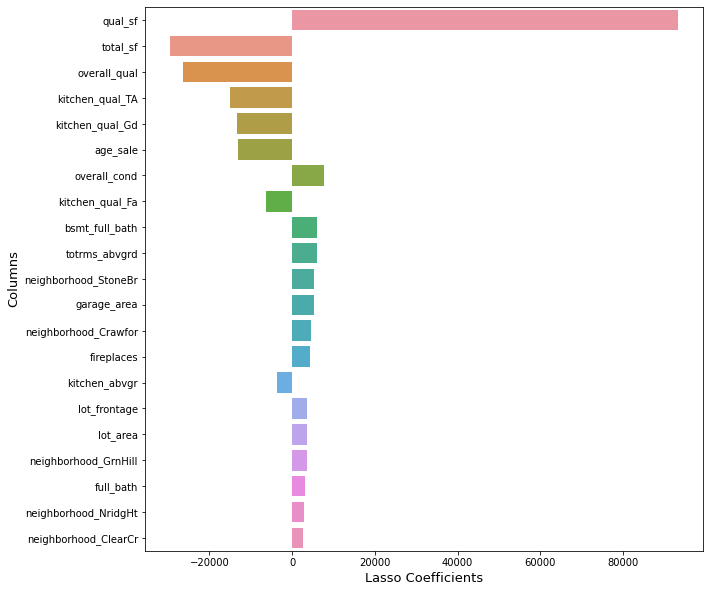

In [418]:
# compare the coefficients visually

plt.figure(figsize = (10, 10))
sns.barplot(x = 'coef', y = 'column', data = lc[:21], orient = 'h')
plt.xlabel('Lasso Coefficients', size = 13)
plt.ylabel('Columns', size = 13)
plt.savefig('../images/lasso_coef_top21.png');


In [420]:
# subset `test` to just the features included in model

X9_kaggle = test.loc[:, X9.columns]    # --> Ridge

X9_1_kaggle = test.loc[:, X9.columns]  # --> Lasso

In [421]:
X9_kaggle.head()

,overall_qual,total_sf,age_sale,garage_area,remod_age,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,...,totrms_abvgrd,fireplaces,garage_cars,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual_Gd,kitchen_qual_TA,kitchen_qual_Fa
id,,,,,,,,,,,,,,,,,,,,,
2658,6,2948,96,440,56,0,0,0,0,0,...,9,0,1,2,0,4,2,0,0,1
2718,5,3934,29,580,29,0,0,0,0,0,...,10,0,2,2,0,6,2,0,1,0
2414,7,2150,0,426,0,0,0,0,0,0,...,7,1,2,2,1,3,1,1,0,0
1989,5,1936,84,480,1,0,0,0,0,0,...,5,0,2,1,0,2,1,0,1,0
625,6,2788,46,514,46,0,0,0,0,0,...,6,2,2,1,1,3,1,0,1,0


In [422]:
# scale the data for test dataset - ridge

Z = sc.transform(X9_kaggle)

In [423]:
Z

array([[-0.04009581,  0.54079929,  2.02758979, ..., -0.75028186,
        -1.09162762,  6.46357314],
       [-0.75256757,  1.81113108, -0.27550198, ..., -0.75028186,
         0.9160633 , -0.15471319],
       [ 0.67237594, -0.48731915, -1.2723626 , ...,  1.33283244,
        -1.09162762, -0.15471319],
       ...,
       [-0.75256757, -0.47057035,  0.10261757, ..., -0.75028186,
         0.9160633 , -0.15471319],
       [-1.46503932, -1.03101085, -0.03488045, ..., -0.75028186,
         0.9160633 , -0.15471319],
       [-0.75256757, -0.87640657,  0.51511162, ..., -0.75028186,
         0.9160633 , -0.15471319]])

In [429]:
# scale the data for test dataset - lasso

Z1 = sc.transform(X9_1_kaggle)

In [430]:
Z1

array([[-0.04009581,  0.54079929,  2.02758979, ..., -0.75028186,
        -1.09162762,  6.46357314],
       [-0.75256757,  1.81113108, -0.27550198, ..., -0.75028186,
         0.9160633 , -0.15471319],
       [ 0.67237594, -0.48731915, -1.2723626 , ...,  1.33283244,
        -1.09162762, -0.15471319],
       ...,
       [-0.75256757, -0.47057035,  0.10261757, ..., -0.75028186,
         0.9160633 , -0.15471319],
       [-1.46503932, -1.03101085, -0.03488045, ..., -0.75028186,
         0.9160633 , -0.15471319],
       [-0.75256757, -0.87640657,  0.51511162, ..., -0.75028186,
         0.9160633 , -0.15471319]])

In [424]:
# predict - ridge

X9_kaggle['saleprice'] = ridge.predict(Z)

In [425]:
X9_kaggle.head(3)

,overall_qual,total_sf,age_sale,garage_area,remod_age,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,...,fireplaces,garage_cars,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual_Gd,kitchen_qual_TA,kitchen_qual_Fa,saleprice
id,,,,,,,,,,,,,,,,,,,,,
2658,6,2948,96,440,56,0,0,0,0,0,...,0,1,2,0,4,2,0,0,1,136249.077180
2718,5,3934,29,580,29,0,0,0,0,0,...,0,2,2,0,6,2,0,1,0,157339.090335
2414,7,2150,0,426,0,0,0,0,0,0,...,1,2,2,1,3,1,1,0,0,193958.674536


In [426]:
# save ridge prediction

output9 = X9_kaggle[['saleprice']]

In [427]:
output9.head()

,saleprice
id,
2658,136249.077180
2718,157339.090335
2414,193958.674536
1989,108088.655270
625,179750.379338


In [428]:
# ridge prediction to csv

output9.to_csv('../datasets/submission9.csv')

In [431]:
# predict - lasso

X9_1_kaggle['saleprice'] = lasso_cv.predict(Z1)

In [432]:
X9_1_kaggle.head(3)

,overall_qual,total_sf,age_sale,garage_area,remod_age,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,...,fireplaces,garage_cars,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual_Gd,kitchen_qual_TA,kitchen_qual_Fa,saleprice
id,,,,,,,,,,,,,,,,,,,,,
2658,6,2948,96,440,56,0,0,0,0,0,...,0,1,2,0,4,2,0,0,1,130871.339411
2718,5,3934,29,580,29,0,0,0,0,0,...,0,2,2,0,6,2,0,1,0,153767.363779
2414,7,2150,0,426,0,0,0,0,0,0,...,1,2,2,1,3,1,1,0,0,194271.608267


In [433]:
# save the lasso prediction

output9_1 = X9_1_kaggle[['saleprice']]

In [434]:
output9_1.head(3)

,saleprice
id,
2658,130871.339411
2718,153767.363779
2414,194271.608267


In [435]:
# save to csv

output9_1.to_csv('../datasets/submission9_1.csv')

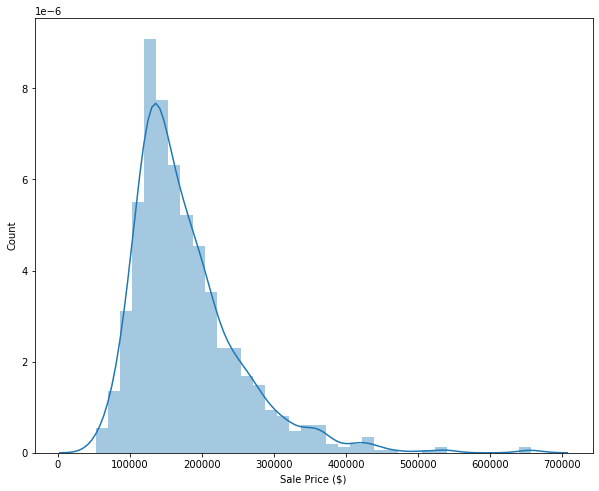

In [442]:
# visualize the prediction distribution

plt.figure(figsize = (10, 8))
sns.distplot(output9_1['saleprice'])
plt.xlabel('Sale Price ($)')
plt.ylabel('Count');
plt.savefig('../images/lassoprediction.png');

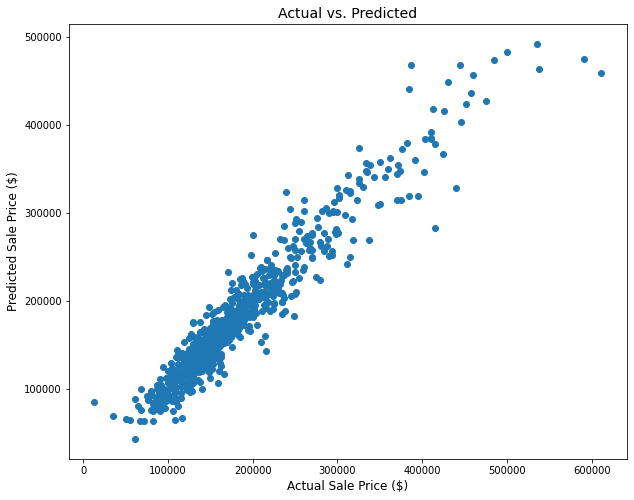

In [30]:
# visualize lasso prediction

plt.figure(figsize=(10,8))
plt.scatter(y9_test, lasso_cv.predict(Z_test))
plt.xlabel('Actual Sale Price ($)', size = 12)
plt.ylabel('Predicted Sale Price ($)', size = 12)
plt.title('Actual vs. Predicted', size = 14)
plt.savefig('/Users/juhee/Desktop/GA/Submissions/Projects/project_2-master/images/final_model_prediction.png');

## Scenario 10
#### KNN model

In [541]:
# import library

from sklearn.neighbors import KNeighborsClassifier

In [547]:
# set X and y

xvars10 = ['qual_sf', 'age_sale']
X10 = house[xvars10]
y10 = house['saleprice']

In [548]:
# train test split

X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10, random_state = 42)

In [549]:
# instantiate standard scaler and fit

ss = StandardScaler()

ss.fit(X10_train)

StandardScaler()

In [550]:
# scaled data mean

ss.mean_

array([16160.13227147,    36.98060942])

In [551]:
# scaled stdev

ss.scale_

array([8093.45510606,   29.32067257])

In [552]:
# scale train/test datasets

X10_train_sc = ss.transform(X10_train) ## same as X_train_sc = ss.fit_transform(X_train)
X10_test_sc = ss.transform(X10_test)

In [553]:
X10_train_sc

array([[-0.7228226 ,  0.68277392],
       [-1.63195225,  1.63773155],
       [ 0.38263853, -0.98840193],
       ...,
       [ 0.96075998, -1.26124697],
       [ 2.23388744, -1.22714134],
       [-0.4206031 , -1.12482445]])

In [554]:
# instantiate knn model

knn = KNeighborsClassifier(n_neighbors = 5)

In [555]:
# cross validation score on scaled data

cross_val_score(knn, X10_train_sc, y10_train).mean() 

# ---> did not perform well probably due to too many binary features

0.004152249134948097

In [556]:
# fit the model

knn.fit(X10_train_sc, y10_train)

KNeighborsClassifier()

In [557]:
# get score of train dataset

knn.score(X10_train_sc, y10_train)

0.21606648199445982

In [558]:
# score the model on testing data

knn.score(X10_test_sc, y10_test)

0.012448132780082987

### Lasso performed the best with R^2 score of 0.92